In [ ]:
!pip install pyAgrum
import pyAgrum as gum

# Exercício sobre redes semânticas

Neste exercício vamos criar uma rede semântica e inferir a partir dela, baseado neste [notebook](http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/01-tutorial.ipynb.html).

## Exemplo inicial

Imagine que temos um ambiente que contém grama e queremos saber se a grama está molhada ou não. Porém, a grama pode estar molhada por conta da chuva, ou por conta de um aspersor de água automático. 

A cidade que está localizada o ambiente varia entre nublado e ensolarado na mesma frequência. Quando está nublado é provável que chova. Quando não está nublado é provável que não chova.

Quando não está nublado, o aspersor fica acionado e desligado na mesma frequência. Já quando está nublado, muito pouco provável que o aspersor estará acionado.

Quando não chove nem o aspersor está ligado, é certo de a grama não estar molhada. Quando o aspersor está ligado e não está chovendo ou quando o aspersor está desligado e está chovendo, é muito provável que a grama esteja molhada. Já se o aspersor está ligado e está chovendo, é quase certo de a grama estar molhada.

Esta descrição está codificada na visualização abaixo.

![alt text](http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/images/waterprinkler.png)

Agora vamos criar nossa rede bayesiana:

In [ ]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


Em seguida criaremos os quatro nós:

In [ ]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
s=bn.add(gum.LabelizedVariable('s','sprinkler ?',2))
r=bn.add(gum.LabelizedVariable('r','rain ?',2))
w=bn.add(gum.LabelizedVariable('w','wet grass ?',2))

E os arcos que ligam eles:

In [ ]:
bn.addArc(c,s)
bn.addArc(c,r)
bn.addArc(s,w)
bn.addArc(r,w)

De forma que a rede está desta forma:

In [ ]:
import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x4650600) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

Agora vamos criar as tabelas de probabilidades associadas a cada nó. Quando o nó não tem condições a priori, ele é definido da seguinte forma:

In [ ]:
bn.cpt(c).fillWith([0.5,0.5])

(gum::Potential<double>@0x470b040) <c:0> :: 0.5 /<c:1> :: 0.5

Quando ele tem condições a priori, é definido desta forma:

In [ ]:
bn.cpt(s)[{'c': 0}] = [0.5,0.5]
bn.cpt(s)[{'c': 1}] = [0.9,0.1]
bn.cpt(s)

(gum::Potential<double>@0x3c6c820) <s:0|c:0> :: 0.5 /<s:1|c:0> :: 0.5 /<s:0|c:1> :: 0.9 /<s:1|c:1> :: 0.1

In [ ]:
bn.cpt(w)[{'r': 0, 's': 0}] = [1, 0]
bn.cpt(w)[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt(w)

(gum::Potential<double>@0x460bf40) <w:0|s:0|r:0> :: 1 /<w:1|s:0|r:0> :: 0 /<w:0|s:1|r:0> :: 0.1 /<w:1|s:1|r:0> :: 0.9 /<w:0|s:0|r:1> :: 0.1 /<w:1|s:0|r:1> :: 0.9 /<w:0|s:1|r:1> :: 0.01 /<w:1|s:1|r:1> :: 0.99

In [ ]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]
bn.cpt(r)

(gum::Potential<double>@0x468a4a0) <r:0|c:0> :: 0.8 /<r:1|c:0> :: 0.2 /<r:0|c:1> :: 0.2 /<r:1|c:1> :: 0.8

Qual é a probabilidade de a grama estar molhada em um caso geral?

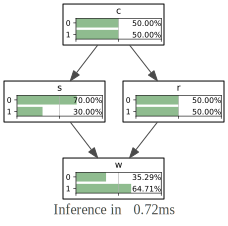

In [ ]:
gnb.showInference(bn,evs={})

Vemos que a probabilidade da grama estar molhada no geral é de 64,7%

Supondo que queremos inferir a partir das seguintes condições a priori:
Não está nublado e o aspersor está ligado. Qual a probabilidade de a grama estar molhada?

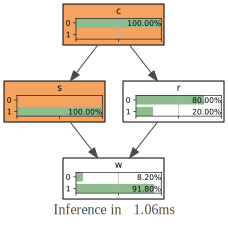

In [ ]:
gnb.showInference(bn,evs={'s':1,'c':0})

Vemos que a probabilidade é de 91,8%.



## Agora é sua vez!

Imagine que está nublado e está chovendo. Qual a probabilidade da grama estar molhada?

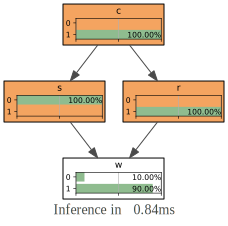

In [ ]:
gnb.showInference(bn,evs={'s':0,'c':1, 'r':1})

Agora queremos que você crie sua própria rede bayesiana baseada em um cenário novo:

Um carro tem muitos componentes que são suscetíveis a falhas. Queremos saber se o nosso carro vai funcionar o motor ou não. 


A bateria do carro foi comprada já usada, então possivelmente ela seja velha. Já o alternador e a correia do alternador são originais, então é pouco provável que estejam quebradas.

Se a bateria do carro for velha, é provável que ela esteja descarregada. Se o alternador do carro estiver quebrado, é quase certo de que a bateria descarregue. Se a correia do alternador do carro estiver quebrada, é quase certo de que a bateria descarregue.

Se a bateria do carro está descarrregada, é quase certo do carro não ligar. Se o óleo do motor estiver baixo, é possível que o motor venha a fundir e, obviamente, não ligar. Se o carro estiver sem gasolina, é certo de o carro não ligar.

1. Construa uma rede bayesiana que represente o texto acima fazendo uso do pyAgrum.
2. Estime subjetivamente, com base no texto, as tabelas de probabilidades e insira-as na rede bayesiana.
3. Responda as seguintes perguntas: 
    1. No caso geral, qual a probabilidade de o carro não ligar?
    2. Se a correia do alternador estiver quebrada e a bateria esteja descarregada, qual a probabilidade do carro ligar?
    3. Se o óleo estiver baixo, qual a probabilidade de o carro ligar?

A probabilidade é de ...

In [ ]:
# Faça seu código aqui
rede_bay = gum.BayesNet('CarOff')
bv = rede_bay.add(gum.LabelizedVariable('bv','Bateria Velha?',2))
aq = rede_bay.add(gum.LabelizedVariable('aq','Alternador Quebrado?',2))
cq = rede_bay.add(gum.LabelizedVariable('cq','Correia Quebrada?',2))
ob = rede_bay.add(gum.LabelizedVariable('ob','Oleo Baixo?',2))
mb = rede_bay.add(gum.LabelizedVariable('mb','Motor batido?',2))
sg = rede_bay.add(gum.LabelizedVariable('sg','Sem Gasolina?',2))
bd = rede_bay.add(gum.LabelizedVariable('bd','Bateria Descarregada?',2))
csl = rede_bay.add(gum.LabelizedVariable('csl','Carro sem ligar'))

In [ ]:
rede_bay.addArc(bv,bd)
rede_bay.addArc(aq,bd)
rede_bay.addArc(cq,bd)
rede_bay.addArc(bd,csl)
rede_bay.addArc(ob,mb)
rede_bay.addArc(mb,csl)
rede_bay.addArc(sg,csl)
rede_bay

(gum::BayesNet<double>@0x4176600) BN{nodes: 8, arcs: 7, domainSize: 256, dim: 46}

In [ ]:
rede_bay.cpt(bv).fillWith([0.8,0.1])
rede_bay.cpt(aq).fillWith([0.75,0.25])
rede_bay.cpt(cq).fillWith([0.8,0.2])
rede_bay.cpt(ob).fillWith([0.6,0.4])
rede_bay.cpt(sg).fillWith([0.8,0.2])

#nos com condições anteriores

#nó do motor batido
rede_bay.cpt(mb)[{'ob': 0}] = [0.9, 0.1]
rede_bay.cpt(mb)[{'ob': 1}] = [0.1, 0.9]

#nó da bateria descarregada
rede_bay.cpt(bd)[{'bv': 0, 'aq': 0, 'cq': 0}] = [0.8, 0.2]
rede_bay.cpt(bd)[{'bv': 0, 'aq': 0, 'cq': 1}] = [0.25, 0.75]
rede_bay.cpt(bd)[{'bv': 0, 'aq': 1, 'cq': 0}] = [0.27, 0.73]
rede_bay.cpt(bd)[{'bv': 0, 'aq': 1, 'cq': 1}] = [0.11, 0.89]
rede_bay.cpt(bd)[{'bv': 1, 'aq': 0, 'cq': 0}] = [0.2, 0.8]
rede_bay.cpt(bd)[{'bv': 1, 'aq': 0, 'cq': 1}] = [0.1, 0.9]
rede_bay.cpt(bd)[{'bv': 1, 'aq': 1, 'cq': 0}] = [0.08, 0.92]
rede_bay.cpt(bd)[{'bv': 1, 'aq': 1, 'cq': 1}] = [0.01, 0.99]

#nó do carro sem ligar
rede_bay.cpt(csl)[{'bd': 0, 'mb': 0, 'sg': 0}] = [0.98, 0.02]
rede_bay.cpt(csl)[{'bd': 0, 'mb': 0, 'sg': 1}] = [0, 1]
rede_bay.cpt(csl)[{'bd': 0, 'mb': 1, 'sg': 0}] = [0.25, 0.75]
rede_bay.cpt(csl)[{'bd': 0, 'mb': 1, 'sg': 1}] = [0, 1]
rede_bay.cpt(csl)[{'bd': 1, 'mb': 0, 'sg': 0}] = [0.1, 0.9]
rede_bay.cpt(csl)[{'bd': 1, 'mb': 0, 'sg': 1}] = [0, 1]
rede_bay.cpt(csl)[{'bd': 1, 'mb': 1, 'sg': 0}] = [0.08,0.92]
rede_bay.cpt(csl)[{'bd': 1, 'mb': 1, 'sg': 1}] = [0, 1]
rede_bay.cpt(csl)



(gum::Potential<double>@0x470ac60) <csl:0|bd:0|mb:0|sg:0> :: 0.98 /<csl:1|bd:0|mb:0|sg:0> :: 0.02 /<csl:0|bd:1|mb:0|sg:0> :: 0.1 /<csl:1|bd:1|mb:0|sg:0> :: 0.9 /<csl:0|bd:0|mb:1|sg:0> :: 0.25 /<csl:1|bd:0|mb:1|sg:0> :: 0.75 /<csl:0|bd:1|mb:1|sg:0> :: 0.08 /<csl:1|bd:1|mb:1|sg:0> :: 0.92 /<csl:0|bd:0|mb:0|sg:1> :: 0 /<csl:1|bd:0|mb:0|sg:1> :: 1 /<csl:0|bd:1|mb:0|sg:1> :: 0 /<csl:1|bd:1|mb:0|sg:1> :: 1 /<csl:0|bd:0|mb:1|sg:1> :: 0 /<csl:1|bd:0|mb:1|sg:1> :: 1 /<csl:0|bd:1|mb:1|sg:1> :: 0 /<csl:1|bd:1|mb:1|sg:1> :: 1

# 1. A predição para a condição csl = 'Carro sem ligar' é:

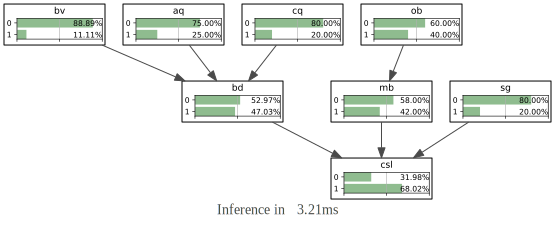

In [ ]:
gnb.showInference(rede_bay,evs={})

Portanto, a probabilidade do carro estar sem ligar é de 68.02%

# 2. Se a correia do alternador estiver quebrada e a bateria esteja descarregada, qual a probabilidade do carro ligar?

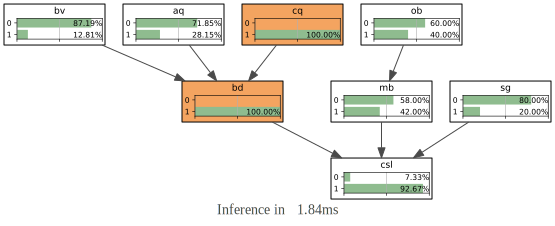

In [ ]:
gnb.showInference(rede_bay,evs={'cq':1,'bd':1})

# 3. Se o óleo estiver baixo, qual a probabilidade de o carro ligar?

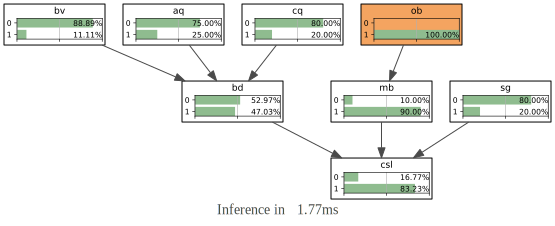

In [ ]:
gnb.showInference(rede_bay,evs={'ob':1})